In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data
train_df = pd.read_csv("/content/train (2).csv")
test_df = pd.read_csv("/content/test (2).csv")

In [ ]:
missing=train_df.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
df = pd.DataFrame(missing)
label = train_df["SalePrice"]
train_df.drop("SalePrice",axis=1,inplace=True)
train_df.drop(df.T.columns,inplace=True,axis=1)
train_df.drop("Id",inplace=True,axis=1)

### Test Dataset

In [364]:
# print(missing.head())
print(missing.keys())
test_id = test_df['Id']
test_df.drop(missing.keys(),inplace=True,axis=1)

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'Electrical'],
      dtype='object')


In [365]:
# Feature Engineering
def feature_engineering(df):
    # Total square footage of the house
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    # Total number of bathrooms
    df['TotalBath'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']

    # Age of the house at the time of sale
    df['Age'] = df['YrSold'] - df['YearBuilt']

    return df

train_df = feature_engineering(train_df)
test_df = feature_engineering(test_df)

In [366]:
train_df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalBath,Age
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,2,2008,WD,Normal,2566,4,5
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,5,2007,WD,Normal,2524,3,31
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,9,2008,WD,Normal,2706,4,7
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,2,2006,WD,Abnorml,2473,2,91
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,12,2008,WD,Normal,3343,4,8


In [367]:
test_df.drop('Id',inplace=True,axis=1)
test_df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalBath,Age
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,120,0,0,6,2010,WD,Normal,1778.0,1.0,49
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,12500,6,2010,WD,Normal,2658.0,2.0,52
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,3,2010,WD,Normal,2557.0,3.0,13
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,6,2010,WD,Normal,2530.0,3.0,12
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,144,0,0,1,2010,WD,Normal,2560.0,2.0,18


In [368]:
# check the numbers of categorical features in train_df

cat_cols = train_df.select_dtypes(include='object').columns.tolist()
print(f"Number of categorical features: {len(cat_cols)}")

# prompt: to chech the numbers of numeric features in train_df

numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"Number of numeric features: {len(numeric_cols)}")

Number of categorical features: 27
Number of numeric features: 36


In [369]:
# prompt: get index of cat_cols in train_df as tuple

cat_col_indices = list(train_df.columns.get_loc(col) for col in cat_cols)
print(cat_col_indices)
print(len(cat_col_indices))

# prompt: get index of cat_cols in train_df as tuple

numeric_cols_indices = list(train_df.columns.get_loc(col) for col in numeric_cols)
print(numeric_cols_indices)
print(len(numeric_cols_indices))


[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24, 29, 30, 31, 42, 44, 48, 58, 59]
27
[0, 2, 14, 15, 16, 17, 25, 26, 27, 28, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62]
36


In [370]:
cat_col_indices_values_df = pd.DataFrame(train_df.iloc[:, cat_col_indices].values, columns=train_df.iloc[:, cat_col_indices].columns)
cat_col_indices_values_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [371]:
numeric_cols_indices_values_df = pd.DataFrame(train_df.iloc[:, numeric_cols_indices].values, columns=train_df.iloc[:, numeric_cols_indices].columns)
numeric_cols_indices_values_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalBath,Age
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,0,2,2008,2566,4,5
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,0,5,2007,2524,3,31
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,0,9,2008,2706,4,7
3,70,9550,7,5,1915,1970,216,0,540,756,...,272,0,0,0,0,2,2006,2473,2,91
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,0,12,2008,3343,4,8


In [372]:
cat_label = pd.concat([cat_col_indices_values_df,label],axis=1)
cat_label.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal,250000


In [373]:
num_cat_label = pd.concat([numeric_cols_indices_values_df,label],axis=1)
num_cat_label.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalBath,Age,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,2,2008,2566,4,5,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,5,2007,2524,3,31,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,9,2008,2706,4,7,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,0,2,2006,2473,2,91,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,12,2008,3343,4,8,250000


In [374]:
num_cat_label.describe(include = "all")

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalBath,Age,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,2567.048630,2.430822,36.547945,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,821.714421,0.922647,30.250152,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,334.000000,1.000000,0.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,2009.500000,2.000000,8.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,2474.000000,2.000000,35.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,3004.000000,3.000000,54.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,11752.000000,6.000000,136.000000,755000.000000


In [375]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [376]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [377]:
src_vocab_size = len(cat_cols)
embed_size = 256
num_layers = 6
heads = 8
forward_expansion = 4
dropout = 8


In [378]:
text = cat_col_indices_values_df[0:1].values.astype(str)

In [379]:

life=[]
for i in text:
    # print(i)
    life = i
print(life)
print(len(life))

['RL' 'Pave' 'Reg' 'Lvl' 'AllPub' 'Inside' 'Gtl' 'CollgCr' 'Norm' 'Norm'
 '1Fam' '2Story' 'Gable' 'CompShg' 'VinylSd' 'VinylSd' 'Gd' 'TA' 'PConc'
 'GasA' 'Ex' 'Y' 'Gd' 'Typ' 'Y' 'WD' 'Normal']
27


In [380]:
list(cat_col_indices_values_df[0:1].values)

[array(['RL', 'Pave', 'Reg', 'Lvl', 'AllPub', 'Inside', 'Gtl', 'CollgCr',
        'Norm', 'Norm', '1Fam', '2Story', 'Gable', 'CompShg', 'VinylSd',
        'VinylSd', 'Gd', 'TA', 'PConc', 'GasA', 'Ex', 'Y', 'Gd', 'Typ',
        'Y', 'WD', 'Normal'], dtype=object)]

In [381]:
list(cat_col_indices_values_df['MSZoning'].unique())

['RL', 'RM', 'C (all)', 'FV', 'RH']

In [382]:
kill = []
for i in cat_col_indices_values_df.columns:
    kill.append(list(cat_col_indices_values_df[i].unique()))

print(kill)

[['RL', 'RM', 'C (all)', 'FV', 'RH'], ['Pave', 'Grvl'], ['Reg', 'IR1', 'IR2', 'IR3'], ['Lvl', 'Bnk', 'Low', 'HLS'], ['AllPub', 'NoSeWa'], ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], ['Gtl', 'Mod', 'Sev'], ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste'], ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe'], ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'], ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin'], ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], ['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv', 'Roll', 'ClyTile'], ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood', 'AsbShng', 'Stucco'

In [383]:
counter = 0
for i in kill:
    one = len(i)
    # print(one)
    counter += one

In [384]:
counter

182

### Modeling

In [385]:
cat_col_indices_values_df = pd.DataFrame(train_df.iloc[:, cat_col_indices].values, columns=train_df.iloc[:, cat_col_indices].columns)
cat_col_indices_values_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [386]:
# src_pad_idx = 0
# trg_pad_idx = 0
# src_vocab_size = counter
# trg_vocab_size = counter
# model = Transformer(src_pad_idx,trg_pad_idx,182,182,dropout=1)
# out = model(text)
# print(out.shape)

### Feature Mappings

In [387]:
feature_map = {}
idx = 0

# Iterate over each list of categories
for category_list in kill:
# Iterate over each category in the list
    for category in category_list:
        # Assign unique index to the category and update the index
        feature_map[category] = idx
        idx += 1

print(feature_map)


{'RL': 0, 'RM': 1, 'C (all)': 2, 'FV': 3, 'RH': 4, 'Pave': 5, 'Grvl': 6, 'Reg': 7, 'IR1': 8, 'IR2': 9, 'IR3': 10, 'Lvl': 11, 'Bnk': 12, 'Low': 13, 'HLS': 14, 'AllPub': 15, 'NoSeWa': 16, 'Inside': 17, 'FR2': 18, 'Corner': 19, 'CulDSac': 20, 'FR3': 21, 'Gtl': 22, 'Mod': 161, 'Sev': 163, 'CollgCr': 25, 'Veenker': 26, 'Crawfor': 27, 'NoRidge': 28, 'Mitchel': 29, 'Somerst': 30, 'NWAmes': 31, 'OldTown': 32, 'BrkSide': 33, 'Sawyer': 34, 'NridgHt': 35, 'NAmes': 36, 'SawyerW': 37, 'IDOTRR': 38, 'MeadowV': 39, 'Edwards': 40, 'Timber': 41, 'Gilbert': 42, 'StoneBr': 43, 'ClearCr': 44, 'NPkVill': 45, 'Blmngtn': 46, 'BrDale': 47, 'SWISU': 48, 'Blueste': 49, 'Norm': 59, 'Feedr': 62, 'PosN': 63, 'Artery': 60, 'RRAe': 66, 'RRNn': 61, 'RRAn': 65, 'PosA': 64, 'RRNe': 58, '1Fam': 67, '2fmCon': 68, 'Duplex': 69, 'TwnhsE': 70, 'Twnhs': 71, '2Story': 72, '1Story': 73, '1.5Fin': 74, '1.5Unf': 75, 'SFoyer': 76, 'SLvl': 77, '2.5Unf': 78, '2.5Fin': 79, 'Gable': 80, 'Hip': 81, 'Gambrel': 82, 'Mansard': 83, 'Flat'

In [388]:
# Map the values in train_df to numerical indices using feature_map
mapped_train_df = train_df.applymap(lambda x: feature_map.get(x, x))

print(mapped_train_df.head())

   MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0          60         0     8450       5         7           11         15   
1          20         0     9600       5         7           11         15   
2          60         0    11250       5         8           11         15   
3          70         0     9550       5         8           11         15   
4          60         0    14260       5         8           11         15   

   LotConfig  LandSlope  Neighborhood  ...  ScreenPorch  PoolArea  MiscVal  \
0         17         22            25  ...            0         0        0   
1         18         22            26  ...            0         0        0   
2         17         22            25  ...            0         0        0   
3         19         22            27  ...            0         0        0   
4         18         22            28  ...            0         0        0   

   MoSold  YrSold  SaleType  SaleCondition  TotalSF  TotalBath

In [389]:
mapped_train_df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalBath,Age
0,60,0,8450,5,7,11,15,17,22,25,...,0,0,0,2,2008,167,176,2566,4,5
1,20,0,9600,5,7,11,15,18,22,26,...,0,0,0,5,2007,167,176,2524,3,31
2,60,0,11250,5,8,11,15,17,22,25,...,0,0,0,9,2008,167,176,2706,4,7
3,70,0,9550,5,8,11,15,19,22,27,...,0,0,0,2,2006,167,177,2473,2,91
4,60,0,14260,5,8,11,15,18,22,28,...,0,0,0,12,2008,167,176,3343,4,8


In [390]:
train_df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalBath,Age
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,2,2008,WD,Normal,2566,4,5
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,5,2007,WD,Normal,2524,3,31
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,9,2008,WD,Normal,2706,4,7
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,2,2006,WD,Abnorml,2473,2,91
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,12,2008,WD,Normal,3343,4,8


In [391]:
# Map the values in train_df to numerical indices using feature_map
mapped_test_df = test_df.applymap(lambda x: feature_map.get(x, x))

print(mapped_test_df.head())

   MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0          20       4.0    11622       5         7           11       15.0   
1          20       0.0    14267       5         8           11       15.0   
2          60       0.0    13830       5         8           11       15.0   
3          60       0.0     9978       5         8           11       15.0   
4         120       0.0     5005       5         8           14       15.0   

   LotConfig  LandSlope  Neighborhood  ...  ScreenPorch  PoolArea  MiscVal  \
0         17         22            36  ...          120         0        0   
1         19         22            36  ...            0         0    12500   
2         17         22            42  ...            0         0        0   
3         17         22            42  ...            0         0        0   
4         17         22            43  ...          144         0        0   

   MoSold  YrSold  SaleType  SaleCondition  TotalSF  TotalBath

In [392]:
cat_col_indices_values_df = pd.DataFrame(mapped_test_df.iloc[:, cat_col_indices].values, columns=mapped_test_df.iloc[:, cat_col_indices].columns)
cat_col_indices_values_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,4.0,5.0,7.0,11.0,15.0,17.0,22.0,36.0,62.0,59.0,...,154.0,135.0,140.0,154.0,164.0,154.0,157.0,164.0,167.0,176.0
1,0.0,5.0,8.0,11.0,15.0,19.0,22.0,36.0,59.0,59.0,...,154.0,135.0,140.0,154.0,164.0,153.0,157.0,164.0,167.0,176.0
2,0.0,5.0,8.0,11.0,15.0,17.0,22.0,42.0,59.0,59.0,...,154.0,134.0,140.0,153.0,164.0,154.0,157.0,164.0,167.0,176.0
3,0.0,5.0,8.0,11.0,15.0,17.0,22.0,42.0,59.0,59.0,...,154.0,134.0,140.0,155.0,164.0,153.0,157.0,164.0,167.0,176.0
4,0.0,5.0,8.0,14.0,15.0,17.0,22.0,43.0,59.0,59.0,...,154.0,134.0,140.0,155.0,164.0,153.0,157.0,164.0,167.0,176.0


#### Working Encoder

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class EncoderLayer(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, dropout=0.1):
        super(EncoderLayer, self).__init__()
        self.self_attention = nn.MultiheadAttention(d_model, n_heads, dropout=dropout)
        self.dropout1 = nn.Dropout(dropout)
        self.norm1 = nn.LayerNorm(d_model)
        self.ffn = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model)
        )
        self.dropout2 = nn.Dropout(dropout)
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, src, src_mask=None):
        src2, _ = self.self_attention(src, src, src, attn_mask=src_mask)
        src = src + self.dropout1(src2)
        src = self.norm1(src)
        src2 = self.ffn(src)
        src = src + self.dropout2(src2)
        src = self.norm2(src)
        return src

class Encoder(nn.Module):
    def __init__(self, num_layers, d_model, n_heads, d_ff, dropout=0.1):
        super(Encoder, self).__init__()
        self.layers = nn.ModuleList([
            EncoderLayer(d_model, n_heads, d_ff, dropout) for _ in range(num_layers)
        ])

    def forward(self, src, src_mask=None):
        for layer in self.layers:
            src = layer(src, src_mask)
        return src

In [394]:
# Example usage:
# Define parameters
num_layers = 6
d_model = 27
n_heads = 1
d_ff = 2048
dropout = 0.1
src_seq_len = 182
batch_size = 32
vocab_size = 182

In [395]:

torch.manual_seed(42)

# Create encoder instance
encoder = Encoder(num_layers, d_model, n_heads, d_ff, dropout)

# Example input tensor
# src_input = torch.randn(batch_size, src_seq_len, d_model)


In [396]:
list(cat_col_indices_values_df[0:1].values)

[array([  4.,   5.,   7.,  11.,  15.,  17.,  22.,  36.,  62.,  59.,  67.,
         73.,  80.,  86., 109., 109., 154., 154., 135., 140., 154., 164.,
        154., 157., 164., 167., 176.])]

In [397]:
cat_col_indices_values_df.values[0]

array([  4.,   5.,   7.,  11.,  15.,  17.,  22.,  36.,  62.,  59.,  67.,
        73.,  80.,  86., 109., 109., 154., 154., 135., 140., 154., 164.,
       154., 157., 164., 167., 176.])

In [398]:
torch.manual_seed(42)
# Example input tensor
src_input = cat_col_indices_values_df.values
src_input = torch.Tensor(src_input)
print("Source Input",src_input)
# enc=encoder(src_input)

Source Input tensor([[  4.,   5.,   7.,  ..., 164., 167., 176.],
        [  0.,   5.,   8.,  ..., 164., 167., 176.],
        [  0.,   5.,   8.,  ..., 164., 167., 176.],
        ...,
        [  0.,   5.,   7.,  ..., 164., 167., 177.],
        [  0.,   5.,   7.,  ..., 164., 167., 176.],
        [  0.,   5.,   7.,  ..., 164., 167., 176.]])


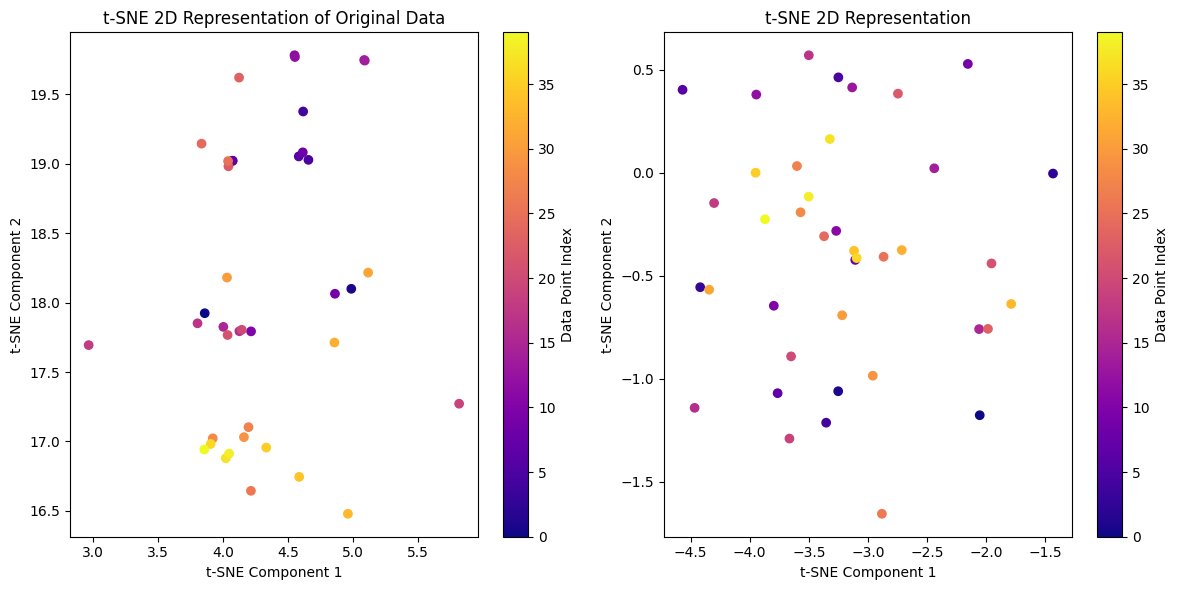

In [399]:
import torch
import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

# Convert the encoded data to numpy array
data_np = src_input[:40].numpy()

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2,random_state=24)
data_tsne = tsne.fit_transform(data_np)

torch.manual_seed(24)
with torch.no_grad():
    encoded_data = encoder(src_input[:40])

# Convert the encoded data to numpy array
encoded_data_np = encoded_data.numpy()

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2,random_state=24)
encoded_data_tsne = tsne.fit_transform(encoded_data_np)

# Plot the 2D representations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=np.arange(len(data_tsne)), cmap='plasma')
plt.title('t-SNE 2D Representation of Original Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Data Point Index')

plt.subplot(1, 2, 2)
plt.scatter(encoded_data_tsne[:, 0], encoded_data_tsne[:, 1], c=np.arange(len(encoded_data_tsne)), cmap='plasma')
plt.title('t-SNE 2D Representation')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Data Point Index')

plt.tight_layout()
plt.show()

### Scaling Instead of Layer Normalization

In [400]:
def min_max_scaling(data):
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data


In [401]:
def z_score_scaling(data):
    mean = data.mean()
    std_dev = data.std()
    scaled_data = (data - mean) / std_dev
    return scaled_data


In [402]:
def robust_scaling(data):

    median = np.median(data, axis=0)
    q1 = np.percentile(data, 25, axis=0)
    q3 = np.percentile(data, 75, axis=0)
    iqr = q3 - q1
    scaled_data = (data - median) / iqr
    return scaled_data

### Testing

### Tab Transformer

In [403]:
def preprocess(train_df,cat_col_indices,numeric_cols_indices,scaling=None,feature_map=feature_map,encoder=encoder,random_seed=42):
    cat_col_indices_values_df = pd.DataFrame(train_df.iloc[:, cat_col_indices].values, columns=train_df.iloc[:, cat_col_indices].columns)
    # print("Categorical features\n",cat_col_indices_values_df.head())
    numeric_cols_indices_values_df = pd.DataFrame(train_df.iloc[:, numeric_cols_indices].values, columns=train_df.iloc[:, numeric_cols_indices].columns)
    # print("Continouns Variable",numeric_cols_indices_values_df.head())

    # Map the values in train_df to numerical indices using feature_map
    mapped_cat_col_indices_values_df = cat_col_indices_values_df.applymap(lambda x: feature_map.get(x, x))


    # print("Mapped Cat_col",mapped_cat_col_indices_values_df.head())

    # Example input tensor
    src_input = mapped_cat_col_indices_values_df.values
    src_input = torch.Tensor(src_input)
    # print("Source Input",src_input)

    torch.manual_seed(42)
    new = []
    enc_values = []

    for i in np.arange(len(src_input)):
        new.append(encoder(src_input[i].unsqueeze(dim=0)))


    for i in new:
        enc_values.append(i.squeeze().detach().numpy())

    enc_values = pd.DataFrame(enc_values)
    enc_values.head()
    # print(enc_values[:5])
    enc_values.columns = cat_col_indices_values_df.columns

    if scaling == min_max_scaling:
        scale = numeric_cols_indices_values_df.apply(min_max_scaling)
        # print("Categorical Value Scaling",scale.head())

    elif scaling == z_score_scaling:
        scale = numeric_cols_indices_values_df.apply(z_score_scaling)
        # print("Numerical Value scaling",scale.head())

    elif scaling == robust_scaling:
        scale = numeric_cols_indices_values_df.apply(robust_scaling)

    else:
         scale = numeric_cols_indices_values_df.apply(scale)

    df = pd.concat([enc_values,scale],axis=1)

    return df

In [404]:
torch.manual_seed(42)
train = preprocess(train_df,cat_col_indices,numeric_cols_indices,scaling=z_score_scaling)
test = preprocess(test_df,cat_col_indices,numeric_cols_indices,scaling=z_score_scaling)

In [405]:
test.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalBath,Age
0,-0.374905,0.272340,-0.746861,0.583495,0.617836,-0.549126,-2.000076,-1.683640,0.130379,0.788400,...,-0.360615,-0.088796,1.818336,-0.057207,-0.092212,-0.038268,1.713318,-0.954199,-1.506470,0.413643
1,-0.548595,0.036891,-1.790587,-0.587995,-0.106514,0.185657,-1.456234,-1.177799,0.357033,0.784716,...,-0.360615,-0.088796,-0.301440,-0.057207,19.723675,-0.038268,1.713318,0.163870,-0.465727,0.512222
2,-0.316681,-0.237141,-1.838955,-0.798887,-0.244566,-0.361408,-0.918528,-0.064002,-0.312674,0.357343,...,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,-1.140224,1.713318,0.035546,0.575016,-0.769313
3,-0.539089,-0.551563,0.334507,-0.991060,0.345996,0.627900,-1.299637,0.213150,-0.899233,0.320126,...,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,-0.038268,1.713318,0.001242,0.575016,-0.802173
4,-1.037729,-0.272491,-0.703803,-0.759865,0.544097,-0.672921,-1.432719,-0.819475,-0.425249,0.775781,...,-0.360615,-0.088796,2.242291,-0.057207,-0.092212,-1.874861,1.713318,0.039358,-0.465727,-0.605014


In [406]:
X_train, X_val, y_train, y_val = train_test_split(train,label,random_state=42,test_size=0.25)

In [407]:
def run_model(model,X_train=X_train,y_train=y_train,X_test=X_val,y_test=y_val):

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_r2_score = r2_score(y_train,y_train_pred)
    model_mse = mean_squared_error(y_train,y_train_pred)
    model_rmse = np.sqrt(model_mse)

    model_test_r2_score = r2_score(y_test,y_test_pred)
    model_test_mse = mean_squared_error(y_test,y_test_pred)
    model_test_rmse = np.sqrt(model_test_mse)

    print("Model Performance For Traning Set")
    print("--"*5)
    print("r2_score: ", model_r2_score)
    print("mean squared error: ", model_mse)
    print("rmse: ", model_test_rmse)
    print("--"*5)

    print("Model Performance For Test Set")
    print("--"*5)
    print("r2_score: ", model_test_r2_score)
    print("mean squared error: ", model_test_mse)
    print("rmse: ", model_test_rmse)
    print("--"*5)
    print(model)
    print("__"*5)

    model_name = model.__repr__()

    # Check if the length of the model name is greater than 20
    if len(model_name) > 20:
        # Take the first ten letters of the model name
        model_name = model_name[:10]

    return {"Model Name" : model_name,
            "r2_score" : model_test_r2_score.round(4),
            "mean squared error" : model_test_mse.round(4),
            "rmse" : model_test_rmse.round(4)}


In [408]:
from sklearn.neural_network import MLPRegressor

In [409]:
from sklearn.metrics import r2_score,mean_squared_error

In [410]:
# train =  pd.concat([train,label],axis= 1)
# train.drop("SalePrice",inplace=True,)
train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalBath,Age
0,-0.360412,0.288928,-0.731428,0.570132,0.622406,-0.526149,-1.945417,-1.768321,0.107245,0.854463,...,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730,-0.001276,1.700736,-1.042902
1,-0.556781,0.034198,-1.761946,-0.587841,-0.073816,0.155323,-1.447709,-1.257631,0.354651,0.852146,...,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228,-0.052389,0.616897,-0.183402
2,-0.314364,-0.239048,-1.822424,-0.803090,-0.202665,-0.417993,-0.917639,-0.199916,-0.367560,0.356956,...,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730,0.169099,1.700736,-0.976787
3,-0.616834,-0.548289,0.275058,-1.031286,0.382445,0.673876,-1.265113,-0.033441,-0.908331,0.355115,...,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,-1.367186,-0.114454,-0.466941,1.800059
4,-1.026064,-0.249559,-0.672943,-0.758513,0.602947,-0.639879,-1.382761,-0.935404,-0.409374,0.869839,...,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.100173,0.138730,0.944308,1.700736,-0.943729


In [411]:
for i in test:
    if test[i].isnull().sum() == 0:
        continue
    else:
        test[i].fillna((test[i].mean()), inplace=True)

In [412]:
X_train.shape

(1095, 63)

In [413]:
MLP = MLPRegressor()
MLP.fit(X_train,y_train)
pred = MLP.predict(X_val)
print("MLP r2_score",r2_score(y_val,pred))
print("MLP mse_score",mean_squared_error(y_val,pred))
neural_net = run_model(MLP)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP r2_score -4.267008850826033
MLP mse_score 36897024781.44293
Model Performance For Traning Set
----------
r2_score:  -5.11738678772709
mean squared error:  37141378224.60476
rmse:  192448.3563160344
----------
Model Performance For Test Set
----------
r2_score:  -4.286900202693495
mean squared error:  37036369848.74333
rmse:  192448.3563160344
----------
MLPRegressor()
__________


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [414]:
print(neural_net)

{'Model Name': 'MLPRegressor()', 'r2_score': -4.2869, 'mean squared error': 37036369848.7433, 'rmse': 192448.3563}


In [415]:
from sklearn.ensemble import RandomForestRegressor

In [416]:
rfr = RandomForestRegressor(n_estimators=200,max_leaf_nodes=60)
rfr.fit(X_train,y_train)
pred = rfr.predict(X_val)
print("Random Forest r2_score",r2_score(y_val,pred))
print("Random Forest mse_score",mean_squared_error(y_val,pred))
random_forest = run_model(rfr)

Random Forest r2_score 0.8689332688293581
Random Forest mse_score 918162958.3302219
Model Performance For Traning Set
----------
r2_score:  0.9539910539576624
mean squared error:  279340791.41476184
rmse:  30717.71274966181
----------
Model Performance For Test Set
----------
r2_score:  0.8653053177924189
mean squared error:  943577876.5707356
rmse:  30717.71274966181
----------
RandomForestRegressor(max_leaf_nodes=60, n_estimators=200)
__________


In [417]:
pip install -q catboost

In [418]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(silent=True)

In [419]:
cbr.fit(X_train,y_train)
pred = cbr.predict(X_val)
print("Catboost r2_score",r2_score(y_val,pred))
print("Catboost mse_score",mean_squared_error(y_val,pred))
cat_boost = run_model(cbr)
print(cat_boost)

Catboost r2_score 0.8887744061197786
Catboost mse_score 779169659.6609315
Model Performance For Traning Set
----------
r2_score:  0.997575325615407
mean squared error:  14721277.485732196
rmse:  27913.61065252812
----------
Model Performance For Test Set
----------
r2_score:  0.8887744061197786
mean squared error:  779169659.6609315
rmse:  27913.61065252812
----------
__________
{'Model Name': '<catboost.', 'r2_score': 0.8888, 'mean squared error': 779169659.6609, 'rmse': 27913.6107}


In [420]:
from sklearn.ensemble import StackingRegressor

In [421]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

estimators = [
    ("cbr",cbr),
    ('rf',rfr),
    ("mlp",MLP)
]

stack_model = StackingRegressor(estimators=estimators,final_estimator=LinearRegression())

stack_model.fit(X_train,y_train)
pred = stack_model.predict(X_val)
print("Stacked model r2_score",r2_score(y_val,pred))
print("Stacked model mse_score",mean_squared_error(y_val,pred))
stacked = run_model(stack_model)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Stacked model r2_score 0.891575566712529
Stacked model mse_score 759546664.0034814


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Model Performance For Traning Set
----------
r2_score:  0.9962177059993618
mean squared error:  22963990.49283462
rmse:  27683.644264852406
----------
Model Performance For Test Set
----------
r2_score:  0.8905995218687786
mean squared error:  766384159.7828954
rmse:  27683.644264852406
----------
StackingRegressor(estimators=[('cbr',
                               <catboost.core.CatBoostRegressor object at 0x7d79fcf839a0>),
                              ('rf',
                               RandomForestRegressor(max_leaf_nodes=60,
                                                     n_estimators=200)),
                              ('mlp', MLPRegressor())],
                  final_estimator=LinearRegression())
__________


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [422]:
print(stacked)

{'Model Name': 'StackingRe', 'r2_score': 0.8906, 'mean squared error': 766384159.7829, 'rmse': 27683.6443}


In [423]:
pred = stack_model.predict(test).round(2)

In [424]:
res = pd.DataFrame({'Id': test_id, 'SalePrice': pred})
res.to_csv('stacked.csv', index=False)

In [425]:
torch.manual_seed(42)
train = preprocess(train_df,cat_col_indices,numeric_cols_indices,scaling=min_max_scaling)
test = preprocess(test_df,cat_col_indices,numeric_cols_indices,scaling=min_max_scaling)

In [426]:
# X_train, X_val, y_train, y_val = train_test_split(train,label,random_state=42,test_size=0.25)

In [427]:
for i in test:
    if test[i].isnull().sum() == 0:
        continue
    else:
        test[i].fillna((test[i].mean()), inplace=True)

In [428]:
train.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalBath,Age
0,-0.360412,0.288928,-0.731428,0.570132,0.622406,-0.526149,-1.945417,-1.768321,0.107245,0.854463,...,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,0.195481,0.6,0.036765
1,-0.556781,0.034198,-1.761946,-0.587841,-0.073816,0.155323,-1.447709,-1.257631,0.354651,0.852146,...,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,0.191802,0.4,0.227941


In [429]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   float32
 1   Street         1460 non-null   float32
 2   LotShape       1460 non-null   float32
 3   LandContour    1460 non-null   float32
 4   Utilities      1460 non-null   float32
 5   LotConfig      1460 non-null   float32
 6   LandSlope      1460 non-null   float32
 7   Neighborhood   1460 non-null   float32
 8   Condition1     1460 non-null   float32
 9   Condition2     1460 non-null   float32
 10  BldgType       1460 non-null   float32
 11  HouseStyle     1460 non-null   float32
 12  RoofStyle      1460 non-null   float32
 13  RoofMatl       1460 non-null   float32
 14  Exterior1st    1460 non-null   float32
 15  Exterior2nd    1460 non-null   float32
 16  ExterQual      1460 non-null   float32
 17  ExterCond      1460 non-null   float32
 18  Foundati

In [430]:
rfr = RandomForestRegressor(n_estimators=200,max_leaf_nodes=60)
rfr.fit(X_train,y_train)
pred = rfr.predict(X_val)
print(r2_score(y_val,pred))
print(mean_squared_error(y_val,pred))

0.8740688974921563
882186292.3692684


In [431]:
pred = rfr.predict(test)
res = pd.DataFrame({'Id': test_id, 'SalePrice': pred})
res.to_csv('robust_scaling.csv', index=False)

In [432]:
pip install -q shap

In [433]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import shap


# Model selection and hyperparameter tuning
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': cb.CatBoostRegressor(silent=True)
}

best_model = None
best_score = np.inf

for name, model in models.items():
    print(f"Training {name}...")
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    for train_index, val_index in kf.split(train):
        X_train, X_val, y_train, y_val = train_test_split(train,label,random_state=42,test_size=0.25)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)
        scores.append(rmse)

    avg_score = np.mean(scores)
    print(f"{name} RMSE: {avg_score}")
    print(f"{name} r2_score: {r2}")
    if avg_score < best_score:
        best_score = avg_score
        best_model = model

# Generate predictions for test set
# test_processed = preprocessor.transform(combined_df[train_df.shape[0]:])
predictions = best_model.predict(test)

Training RandomForest...
RandomForest RMSE: 29707.483112776845
RandomForest r2_score: 0.8706984679311696
Training GradientBoosting...
GradientBoosting RMSE: 26127.85927588397
GradientBoosting r2_score: 0.9017484732071113
Training XGBoost...
XGBoost RMSE: 28095.29513087271
XGBoost r2_score: 0.8873218008522765
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9774
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 61
[LightGBM] [Info] Start training from score 181712.286758
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9774
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 61
[LightGBM] [Info] Start training fr

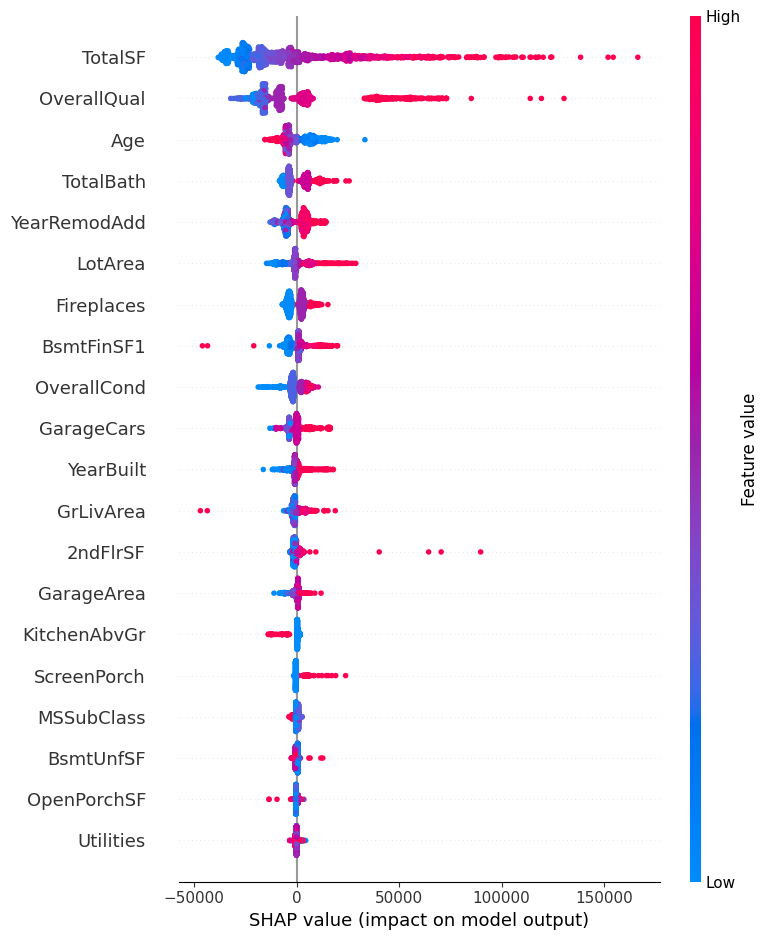

In [434]:
# Feature importance analysis
shap.initjs()
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(train)
shap.summary_plot(shap_values, train)

In [435]:
# Create submission file
submission_df = pd.DataFrame({'Id': test_id, 'SalePrice': predictions})
submission_df.to_csv('stacked4.csv', index=False)

In [461]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

In [437]:
pred = lr.predict(test)
# Create submission file
submission_df = pd.DataFrame({'Id': test_id, 'SalePrice': pred})
submission_df.to_csv('Linear Regression.csv', index=False)

In [438]:
r2

0.8166403133210676

In [ ]:
pip install -q lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values, feature_names=train.columns, mode='regression')
explanation = explainer.explain_instance(X_val.iloc[0], lr.predict)


In [ ]:
explanation.show_in_notebook(show_table=True)

In [442]:
from mlxtend.regressor import StackingCVRegressor

# Define base models
base_models = [
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor()),
    ('XGBoost', xgb.XGBRegressor()),
    ('LightGBM', lgb.LGBMRegressor()),
    ('CatBoost', cb.CatBoostRegressor(silent=True))
]

# Define meta model
meta_model = xgb.XGBRegressor()

# Define stacking model with CV
stacking_model = StackingCVRegressor(regressors=[model for _, model in base_models],
                                     meta_regressor=meta_model,
                                     cv=KFold(n_splits=5, shuffle=True, random_state=42))

# Define hyperparameters to search for each base model
parameters = {
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}
}

# Perform GridSearchCV for each base model
for name, model in base_models:
    grid_search = GridSearchCV(model, parameters[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best parameters for {name}: {best_params}")
    print(f"Best cross-validation score for {name}: {best_score}")
    print()

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model on the test set
stacking_pred = stacking_model.predict(X_val)
stacking_mse = mean_squared_error(y_val, stacking_pred)
stacking_r2 = r2_score(y_val, stacking_pred)
print("Stacking Model MSE:", stacking_mse)
print("Stacking Model r2_score:", stacking_r2)

Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation score for RandomForest: -1073635169.0452226

Best parameters for GradientBoosting: {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score for GradientBoosting: -1034796219.3033345

Best parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 50}
Best cross-validation score for XGBoost: -1052452055.810427

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9614
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 60
[LightGBM] [Info] Start training from score 179921.786530
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [443]:
pred = stacking_model.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [444]:
submission_df = pd.DataFrame({'Id': test_id, 'SalePrice': pred})
submission_df.to_csv('stacking_pred.csv', index=False)

In [445]:
np.sqrt(1083473259.7283974)

32916.15499611699

In [446]:
r2_score(y_val, stacking_pred)

0.8597039970225073

In [ ]:
torch.manual_seed(42)
train = preprocess(train_df,cat_col_indices,numeric_cols_indices,scaling=min_max_scaling)
test = preprocess(test_df,cat_col_indices,numeric_cols_indices,scaling=min_max_scaling)

In [ ]:
run_model(rfr)

In [ ]:
run_model(cbr)

In [ ]:
run_model(stack_model)

### Top Model

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import shap

# Load the data
train_df = pd.read_csv("/content/train (2).csv")
test_df = pd.read_csv('/content/test (2).csv')
test_id = test_df['Id']

# Data preprocessing and feature engineering
def preprocess_data(df):
    # Drop columns with high missing values or low variance
    df.drop(columns=['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)

    # Fill missing values
    df.fillna({'FireplaceQu': 'NA', 'LotFrontage': df['LotFrontage'].median(), 'GarageType': 'NA',
                'GarageFinish': 'NA', 'GarageQual': 'NA', 'GarageCond': 'NA', 'BsmtQual': 'NA',
                'BsmtCond': 'NA', 'BsmtExposure': 'NA', 'BsmtFinType1': 'NA', 'BsmtFinType2': 'NA',
                'MasVnrType': 'None', 'MasVnrArea': 0, 'Electrical': 'SBrkr'}, inplace=True)

    # Encode categorical variables
    df = pd.get_dummies(df, drop_first=True)

    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Combine train and test data for preprocessing
combined_df = pd.concat([train_df.drop(columns='SalePrice'), test_df], axis=0)

# Feature Engineering
def feature_engineering(df):
    # Total square footage of the house
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    # Total number of bathrooms
    df['TotalBath'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']

    # Age of the house at the time of sale
    df['Age'] = df['YrSold'] - df['YearBuilt']

    return df

combined_df = feature_engineering(combined_df)

# Separate features and target variable
X = combined_df[:train_df.shape[0]]
y = train_df['SalePrice']

# Preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

X_processed = preprocessor.fit_transform(X)

# Model selection and hyperparameter tuning
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': cb.CatBoostRegressor(silent=True)
}

best_model = None
best_score = np.inf

for name, model in models.items():
    print(f"Training {name}...")
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    for train_index, val_index in kf.split(X_processed):
        X_train, X_val = X_processed[train_index], X_processed[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        scores.append(rmse)

    avg_score = np.mean(scores)
    print(f"{name} RMSE: {avg_score}")
    if avg_score < best_score:
        best_score = avg_score
        best_model = model

# Feature importance analysis
shap.initjs()
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_processed)
shap.summary_plot(shap_values, X)

# Generate predictions for test set
test_processed = preprocessor.transform(combined_df[train_df.shape[0]:])
predictions = best_model.predict(test_processed)

# Create submission file
submission_df = pd.DataFrame({'Id': test_id, 'SalePrice': predictions})
submission_df.to_csv('submission.csv', index=False)


### Others

In [ ]:
# Load the data
train_df = pd.read_csv("/content/train (2).csv")
test_df = pd.read_csv('/content/test (2).csv')
test_id = test_df['Id']

# Data preprocessing and feature engineering
def preprocess_data(df):
    # Drop columns with high missing values or low variance
    df.drop(columns=['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)

    # Fill missing values
    df.fillna({'FireplaceQu': 'NA', 'LotFrontage': df['LotFrontage'].median(), 'GarageType': 'NA',
                'GarageFinish': 'NA', 'GarageQual': 'NA', 'GarageCond': 'NA', 'BsmtQual': 'NA',
                'BsmtCond': 'NA', 'BsmtExposure': 'NA', 'BsmtFinType1': 'NA', 'BsmtFinType2': 'NA',
                'MasVnrType': 'None', 'MasVnrArea': 0, 'Electrical': 'SBrkr'}, inplace=True)

    # Encode categorical variables
    # df = pd.get_dummies(df, drop_first=True)

    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Combine train and test data for preprocessing
combined_df = pd.concat([train_df.drop(columns='SalePrice'), test_df], axis=0)



combined_df = feature_engineering(combined_df)
train_columns = combined_df.columns
# print(train_columns)


# check the numbers of categorical features in train_df

cat_cols = combined_df.select_dtypes(include='object').columns.tolist()
print(f"Number of categorical features: {len(cat_cols)}")

# prompt: to chech the numbers of numeric features in train_df

numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"Number of numeric features: {len(numeric_cols)}")

# prompt: get index of cat_cols in train_df as tuple

cat_col_indices = list(combined_df.columns.get_loc(col) for col in cat_cols)
print(cat_col_indices)
print(len(cat_col_indices))

# prompt: get index of cat_cols in train_df as tuple

numeric_cols_indices = list(combined_df.columns.get_loc(col) for col in numeric_cols)
print(numeric_cols_indices)
print(len(numeric_cols_indices))


# Separate features and target variable
X = combined_df[:train_df.shape[0]]
y = train_df['SalePrice']

# X_processed = preprocessor.fit_transform(X)
# Generate predictions for test set
# test_processed = preprocessor.transform(combined_df[train_df.shape[0]:])

In [ ]:
train_df.head()

In [ ]:
cat_col_indices_values_df = pd.DataFrame(combined_df.iloc[:, cat_col_indices].values, columns=combined_df.iloc[:, cat_col_indices].columns)
cat_col_indices_values_df.head()

In [ ]:
src_vocab_size = len(cat_cols)
embed_size = 256
num_layers = 6
heads = 8
forward_expansion = 4
dropout = 0.1


text = cat_col_indices_values_df[0:1].values.astype(str)

life=[]
for i in text:
    # print(i)
    life = i
print(life)
print(len(life))


kill = []
for i in cat_col_indices_values_df.columns:
    kill.append(list(cat_col_indices_values_df[i].unique()))

print(kill)

counter = 0
for i in kill:
    one = len(i)
    # print(one)
    counter += one

In [ ]:
counter

In [ ]:
feature_map = {}
idx = 0

# Iterate over each list of categories
for category_list in kill:
# Iterate over each category in the list
    for category in category_list:
        # Assign unique index to the category and update the index
        feature_map[category] = idx
        idx += 1

print(feature_map)


# Map the values in train_df to numerical indices using feature_map
mapped_train_df = train_df.applymap(lambda x: feature_map.get(x, x))

print(mapped_train_df.head())

In [ ]:
print(feature_map)

In [ ]:
torch.manual_seed(42)

# Create encoder instance
encoder = Encoder(num_layers, d_model, n_heads, d_ff, dropout)

# Example input tensor
# src_input = torch.randn(batch_size, src_seq_len, d_model)


In [ ]:
torch.manual_seed(42)
processed_df = = preprocess(combined_df,cat_col_indices,numeric_cols_indices,scaling=min_max_scaling)
